**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Menghang Wu
- Cecilia Lin
- Julie Cai
- Yunfei Shih
- Guan Huang Chen

# Research Question

Is there a statistically significant difference in the preference for hybrid plug-in vehicles versus battery electric vehicles (EVs) across the counties in Washington?

## Background and Prior Work

In recent years, heightened concerns over climate change and air pollution have drawn significant attention to sustainable transportation. Electric vehicles (EVs) and hybrid vehicles are gaining traction across the United States, particularly in eco-conscious states like Washington. These vehicles are essential for reducing greenhouse gas emissions and lowering dependency on fossil fuels. Additionally, rising fuel prices are prompting more consumers to consider electric or fuel-efficient hybrid options.

Although both governments and businesses actively promote the electric vehicle market, consumer preferences vary considerably by region, especially in the choice between hybrid vehicles and battery electric vehicles (BEVs). Understanding these regional preferences offers valuable insights for assessing market demand and shaping policies that support a smoother transition toward electrification in the transportation sector.

Prior studies indicate that preferences for EVs and hybrids differ across geographic regions. In a study by Nelder and Jung (2016)<a name="cite_ref-1.1"></a>[<sup>1</sup>](#cite_note-1.1), factors influencing the adoption of EVs were examined, including the distribution of charging infrastructure, vehicle range, and geographic characteristics. These factors significantly impact the efficiency of both hybrid and electric vehicles, influencing consumer preferences for each type across different areas.

Another relevant study by Morrissey et al. (2016)<a name="cite_ref-1.2"></a>[<sup>2</sup>](#cite_note-1.2) analyzed EV adoption patterns in several European countries, focusing on urban versus rural regions. They found that urban consumers were more inclined to choose BEVs due to readily available charging infrastructure, whereas rural areas favored hybrids, given their flexibility in regions with limited charging options. This research supports the notion that consumer preferences for hybrids and BEVs may vary based on infrastructure and geography, aligning closely with our research question of whether statistically significant preference differences exist across Washington counties.

References:
1. <a name="cite_note-1.1"></a> [^](#cite_ref-1)Nelder, C., & Jung, C. (2016). The future of electric vehicles in the U.S.: Forecasts and projections. Rocky Mountain Institute.https://rmi.org

2. <a name="cite_note-1.2"></a> [^](#cite_ref-2)Morrissey, P., Weldon, P., & O'Mahony, M. (2016). Future standard and fast charging infrastructure planning: An analysis of charging behaviour in EV-ready urban regions. Journal of Transport Geography.
https://www.infona.pl/resource/bwmeta1.element.elsevier-5c9e73d4-17a4-38da-ae24-db1598cce4d7


# Hypothesis


We predict that the counties across Washington has a statistically significant preference for battery electric vehicles (BEVs) over hybrid plug-in vehicle. The preference will be measure by the ratio of BEV and plug-in vehicle across the counties. We believe that people perfer BEVs more because the price of BEVs is lower than hybrid vehicles and consumers do not need to be concerned with the fluctuating price of gasoline.

# Data

## Data overview

- Dataset #1
  - Dataset Name: Electric Vehicle Population Data
  - Link to the dataset: https://catalog.data.gov/dataset/electric-vehicle-population-data
  - Number of observations: 210162
  - Number of variables: 17

The dataset includes all electric car registered across the counties in Washington state, and the model year of the EVs varied from 1999 to 2025. It has 210162 rows of observations as the population, and we could sample randomly from the dataset if needed. The dataset allows us to conduct for statistical analysis since the samples would be over 1000 observations.

Most of the variables are categorical variables, stored as string, such as County, City, Model Year, Make, and Electric Vehicle Type. There are only two quantitative variables stored as float, which is Electric Range and Base MSRP. Electric Range describes the distance that EV can travel on a single charge of its battery, while Base MSRP describes the manufacturer price of a EV without any additional features.

The important variables of the dataset for our project are County and Electric Vehicle Type. The County column includes the county of the EV is registered in, and the Electric Vehicle Type identifies the vehicle as Plug-in Hybrid Electric Vehicle (PHEV) or Battery Electric Vehicle (BEV). ANother variable that we might dive into would be Base MSRP since we think there would be more BEVs due to the cheaper price.

To prepare for the analysis, we could store the dataset as a Pandas dataframe, drop uncessary features to lessen computational burden, check missing values, and ensure correct data types for features. We would also group by the EV by counties to gain insight on the percent ratio of BEVs and PHEVs across the counties.

## Electric Vehicle Population Data

In [15]:
# pip install geoplot

In [16]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np
import geoplot as gplt

In [17]:
ev_population = pd.read_csv('Electric_Vehicle_Population_Data.csv')
ev_population.head(3)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5UXTA6C0XM,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,30.0,0.0,35.0,267929112,POINT (-122.8728334 47.5798304),PUGET SOUND ENERGY INC,5.303509e+10
1,5YJ3E1EB1J,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215.0,0.0,23.0,475911439,POINT (-122.6368884 47.7469547),PUGET SOUND ENERGY INC,5.303509e+10
2,WP0AD2A73G,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,15.0,0.0,1.0,101971278,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10


In [18]:
#check number of observations and variables
ev_population.shape

(210165, 17)

In [19]:
#check datatypes
ev_population.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                       float64
Base MSRP                                            float64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [20]:
# drop irrevelant columns and keep variables that we might use for analysis
ev_clean = ev_population.drop(columns = ['VIN (1-10)', 
                                         'Legislative District', 
                                         'DOL Vehicle ID',  
                                         'Electric Utility', 
                                         '2020 Census Tract',
                                         'Electric Range'])
ev_clean.head()

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Vehicle Location
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,0.0,POINT (-122.8728334 47.5798304)
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,POINT (-122.6368884 47.7469547)
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,0.0,POINT (-122.206146 47.839957)
3,Kitsap,Bremerton,WA,98310.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,POINT (-122.6231895 47.5930874)
4,King,Redmond,WA,98052.0,2019,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,0.0,POINT (-122.13158 47.67858)


In [21]:
#check for missing values
ev_clean.isna().any()

County                                                True
City                                                  True
State                                                False
Postal Code                                           True
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Base MSRP                                             True
Vehicle Location                                      True
dtype: bool

In [22]:
#check number of rows with missing Base MSRP
ev_clean['Base MSRP'].value_counts().head()

Base MSRP
0.0        206851
69900.0      1334
31950.0       367
52900.0       221
32250.0       142
Name: count, dtype: int64

There is 20681 rows that does not have base MSRP, so we fill them by the group mean base MSPR of the make of the model to limit possible bias.

In [23]:
ev_clean['Base MSRP'].replace(0, np.nan, inplace=True)
ev_clean['Base MSRP'] = ev_clean.groupby('Make')['Base MSRP'].transform(lambda x: x.fillna(x.mean()))

#for those make that does not have a base msrp, we fill it with the mean based on the vehicle type
ev_clean['Base MSRP'] = ev_clean.groupby('Electric Vehicle Type')['Base MSRP'].transform(lambda x: x.fillna(x.mean()))


/var/folders/w5/65_btzss5j93yhssh2x900rr0000gn/T/ipykernel_81366/1464208548.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ev_clean['Base MSRP'].replace(0, np.nan, inplace=True)


We drop the missing values in the categorical variables since if we randomly assign the vehicle to a county it could lead to significant bias in the analysis.

In [24]:
ev_clean = ev_clean.dropna(subset=['County', 'City', 'Postal Code', 'Vehicle Location'])

In [25]:
ev_clean.isna().any()

County                                               False
City                                                 False
State                                                False
Postal Code                                          False
Model Year                                           False
Make                                                 False
Model                                                False
Electric Vehicle Type                                False
Clean Alternative Fuel Vehicle (CAFV) Eligibility    False
Base MSRP                                            False
Vehicle Location                                     False
dtype: bool

In [26]:
ev_clean.head(3)

,County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Base MSRP,Vehicle Location
0,Kitsap,Seabeck,WA,98380.0,2021,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,52859.547244,POINT (-122.8728334 47.5798304)
1,Kitsap,Poulsbo,WA,98370.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,70175.777631,POINT (-122.6368884 47.7469547)
2,Snohomish,Bothell,WA,98012.0,2016,PORSCHE,PANAMERA,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,132440.000000,POINT (-122.206146 47.839957)


Now that the data is cleaned, we will start diving into the relationships across the variables.

In [27]:
ev_clean['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            165549
Plug-in Hybrid Electric Vehicle (PHEV)     44606
Name: count, dtype: int64

In [28]:
#look at the distribution of the vehicle types across counties
ev_count_by_county = ev_clean.groupby(['County','Electric Vehicle Type'])['City'].size().reset_index(name='Count')
ev_count_by_county

,County,Electric Vehicle Type,Count
0,Ada,Battery Electric Vehicle (BEV),2
1,Adams,Battery Electric Vehicle (BEV),46
2,Adams,Plug-in Hybrid Electric Vehicle (PHEV),21
3,Alameda,Battery Electric Vehicle (BEV),4
4,Alameda,Plug-in Hybrid Electric Vehicle (PHEV),1
...,...,...,...
283,Yakima,Battery Electric Vehicle (BEV),912
284,Yakima,Plug-in Hybrid Electric Vehicle (PHEV),372
285,Yolo,Battery Electric Vehicle (BEV),3
286,York,Battery Electric Vehicle (BEV),1


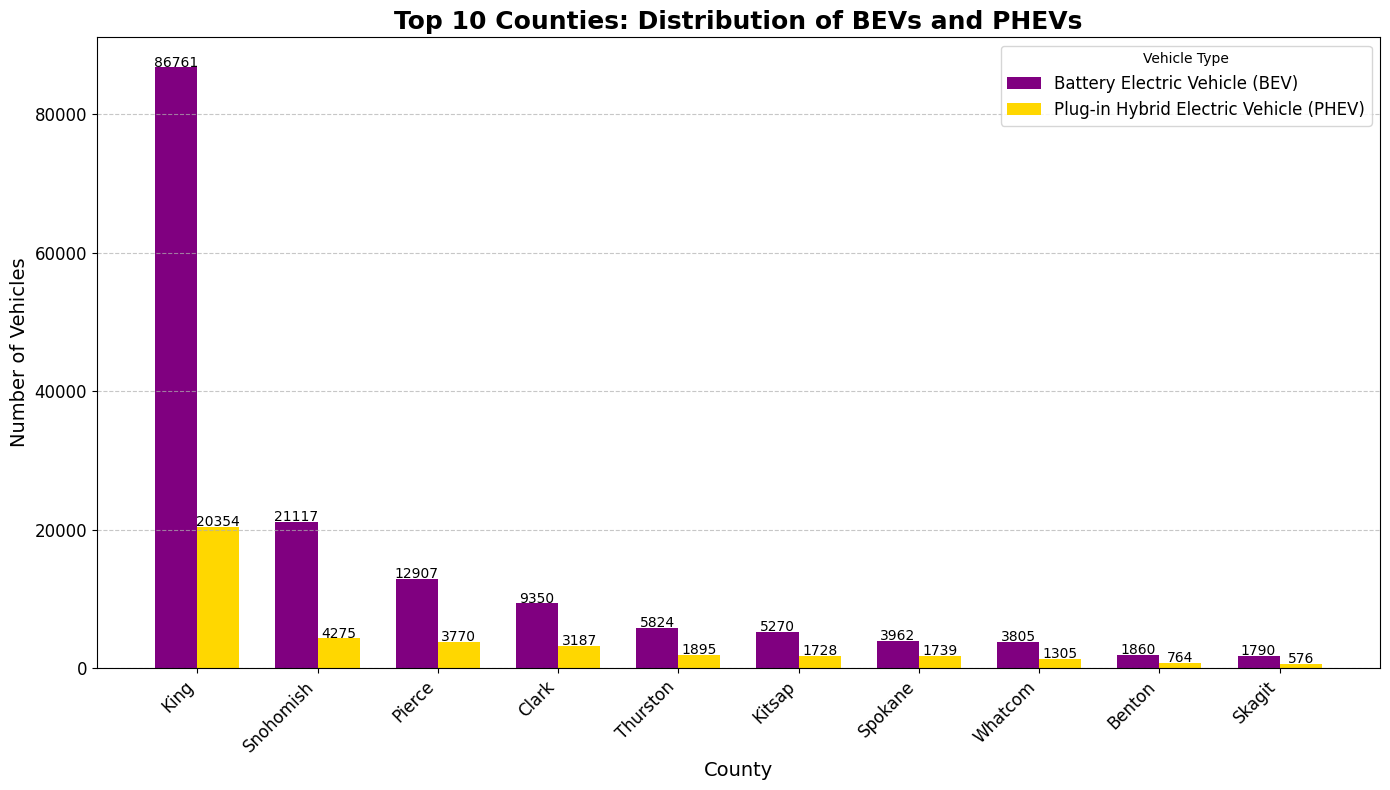

In [58]:
# Filter the top 10 counties by total EV count
top_counties = county_type_counts.sum(axis=1).nlargest(10).index
filtered_data = county_type_counts.loc[top_counties]

# Set up bar positions
bar_width = 0.35
counties = filtered_data.index
indices = np.arange(len(counties))

# Plot BEVs and PHEVs as separate bars
plt.figure(figsize=(14, 8))
plt.bar(indices - bar_width/2, filtered_data['Battery Electric Vehicle (BEV)'], 
        bar_width, label='Battery Electric Vehicle (BEV)', color='purple')
plt.bar(indices + bar_width/2, filtered_data['Plug-in Hybrid Electric Vehicle (PHEV)'], 
        bar_width, label='Plug-in Hybrid Electric Vehicle (PHEV)', color='gold')

# Add titles and labels
plt.title('Top 10 Counties: Distribution of BEVs and PHEVs', fontsize=18, fontweight='bold')
plt.xlabel('County', fontsize=14)
plt.ylabel('Number of Vehicles', fontsize=14)
plt.xticks(indices, counties, fontsize=12, rotation=45, ha='right')
plt.yticks(fontsize=12)
plt.legend(title='Vehicle Type', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Annotate bars with their exact values
for i, county in enumerate(counties):
    plt.text(indices[i] - bar_width/2, filtered_data.loc[county, 'Battery Electric Vehicle (BEV)'] + 100, 
             str(filtered_data.loc[county, 'Battery Electric Vehicle (BEV)']), ha='center', fontsize=10)
    plt.text(indices[i] + bar_width/2, filtered_data.loc[county, 'Plug-in Hybrid Electric Vehicle (PHEV)'] + 100, 
             str(filtered_data.loc[county, 'Plug-in Hybrid Electric Vehicle (PHEV)']), ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()

# Interpretation:
# This grouped bar chart clearly shows the separate counts for BEVs and PHEVs in the top 10 counties. 
# It highlights the dominance of BEVs in most counties, while also revealing the proportion of PHEVs in each.


/var/folders/w5/65_btzss5j93yhssh2x900rr0000gn/T/ipykernel_81366/2714524541.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


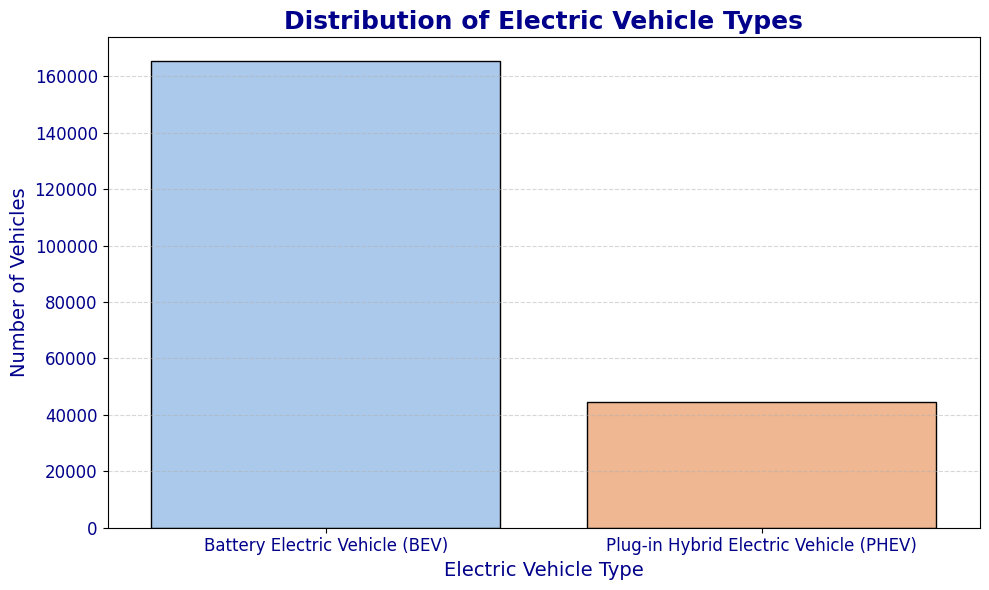

In [59]:
# Calculate the counts for each vehicle type
ev_type_counts = ev_population['Electric Vehicle Type'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(
    x=ev_type_counts.index, 
    y=ev_type_counts.values, 
    palette="pastel",  # Use a brighter pastel color palette
    edgecolor="black"  # Add a black outline to bars for contrast
)
plt.title('Distribution of Electric Vehicle Types', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Electric Vehicle Type', fontsize=14, color='darkblue')
plt.ylabel('Number of Vehicles', fontsize=14, color='darkblue')
plt.xticks(fontsize=12, color='darkblue')
plt.yticks(fontsize=12, color='darkblue')
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Subtle gridlines for better readability
plt.tight_layout()
plt.show()

# Interpretation:
# The updated bar chart uses bright colors and clean formatting to show that BEVs dominate the dataset,
# while PHEVs represent a smaller portion, supporting the hypothesis of BEV preference.



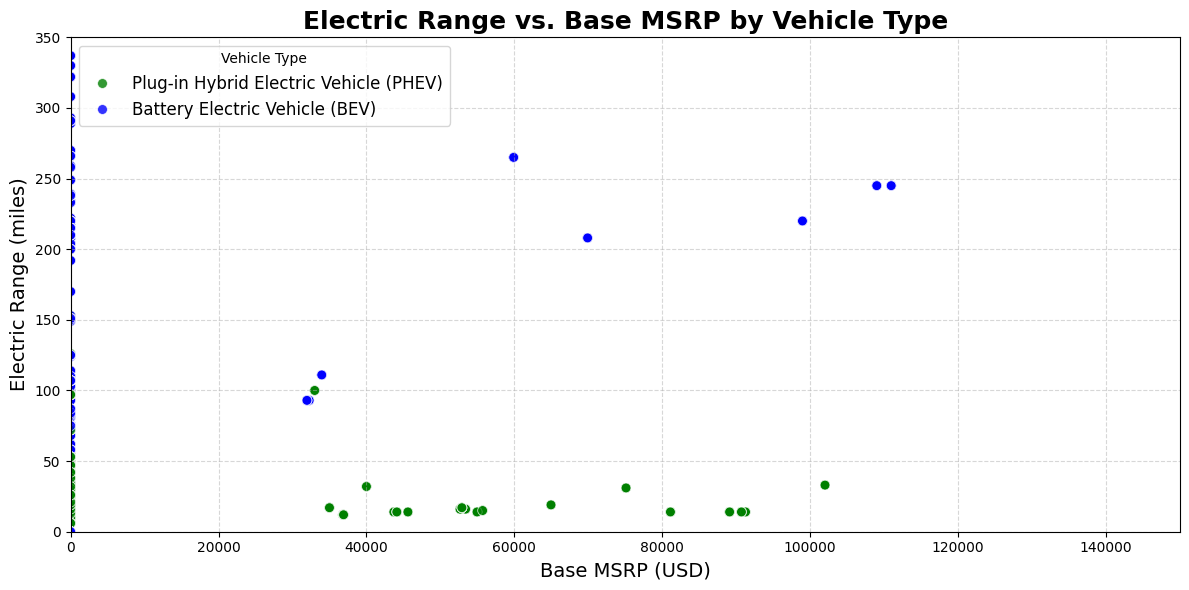

In [63]:
# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=ev_population, 
    x='Base MSRP', 
    y='Electric Range', 
    hue='Electric Vehicle Type', 
    alpha=0.8, 
    palette={'Battery Electric Vehicle (BEV)': 'blue', 'Plug-in Hybrid Electric Vehicle (PHEV)': 'green'},
    s=50  # Set marker size for better readability
)

# Limit axes to focus on relevant data
plt.xlim(0, 150000)  # Focus on MSRP less than 150,000
plt.ylim(0, 350)     # Electric range capped at 350 miles

# Title and Labels
plt.title('Electric Range vs. Base MSRP by Vehicle Type', fontsize=18, fontweight='bold')
plt.xlabel('Base MSRP (USD)', fontsize=14)
plt.ylabel('Electric Range (miles)', fontsize=14)
plt.legend(title='Vehicle Type', fontsize=12, loc='upper left')
plt.grid(axis='both', linestyle='--', alpha=0.5)

# Improve layout
plt.tight_layout()
plt.show()

# Interpretation:
# This scatter plot focuses on relevant price and range data. BEVs generally have higher ranges
# but also higher MSRPs compared to PHEVs. This supports the hypothesis that consumers prefer BEVs for their range advantage.

# Results

## Exploratory Data Analysis

Carry out whatever EDA you need to for your project.  Because every project will be different we can't really give you much of a template at this point. But please make sure you describe the what and why in text here as well as providing interpretation of results and context.

### Section 1 of EDA - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [32]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

### Section 2 of EDA if you need it  - please give it a better title than this

Some more words and stuff.  Remember notebooks work best if you interleave the code that generates a result with properly annotate figures and text that puts these results into context.

In [33]:
## YOUR CODE HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION

# Ethics & Privacy

- Thoughtful discussion of ethical concerns included
- Ethical concerns consider the whole data science process (question asked, data collected, data being used, the bias in data, analysis, post-analysis, etc.)
- How your group handled bias/ethical concerns clearly described

Acknowledge and address any ethics & privacy related issues of your question(s), proposed dataset(s), and/or analyses. Use the information provided in lecture to guide your group discussion and thinking. If you need further guidance, check out [Deon's Ethics Checklist](http://deon.drivendata.org/#data-science-ethics-checklist). In particular:

- Are there any biases/privacy/terms of use issues with the data you propsed?
- Are there potential biases in your dataset(s), in terms of who it composes, and how it was collected, that may be problematic in terms of it allowing for equitable analysis? (For example, does your data exclude particular populations, or is it likely to reflect particular human biases in a way that could be a problem?)
- How will you set out to detect these specific biases before, during, and after/when communicating your analysis?
- Are there any other issues related to your topic area, data, and/or analyses that are potentially problematic in terms of data privacy and equitable impact?
- How will you handle issues you identified?

# Team Expectations 


Read over the [COGS108 Team Policies](https://github.com/COGS108/Projects/blob/master/COGS108_TeamPolicies.md) individually. Then, include your group’s expectations of one another for successful completion of your COGS108 project below. Discuss and agree on what all of your expectations are. Discuss how your team will communicate throughout the quarter and consider how you will communicate respectfully should conflicts arise. By including each member’s name above and by adding their name to the submission, you are indicating that you have read the COGS108 Team Policies, accept your team’s expectations below, and have every intention to fulfill them. These expectations are for your team’s use and benefit — they won’t be graded for their details.

* *Team Expectation 1*
* *Team Expectation 2*
* *Team Expecation 3*
* ...

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 1/20  |  1 PM | Read & Think about COGS 108 expectations; brainstorm topics/questions  | Determine best form of communication; Discuss and decide on final project topic; discuss hypothesis; begin background research | 
| 1/26  |  10 AM |  Do background research on topic | Discuss ideal dataset(s) and ethics; draft project proposal | 
| 2/1  | 10 AM  | Edit, finalize, and submit proposal; Search for datasets  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 2/14  | 6 PM  | Import & Wrangle Data (Ant Man); EDA (Hulk) | Review/Edit wrangling/EDA; Discuss Analysis Plan   |
| 2/23  | 12 PM  | Finalize wrangling/EDA; Begin Analysis (Iron Man; Thor) | Discuss/edit Analysis; Complete project check-in |
| 3/13  | 12 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 3/20  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |